# 주택가격예측

In [8]:
!git remote add origin https://github.com/SON-JUYOUNG/HomePriceForecasting.Kaggle.git
!git branch -M main
!git push -u origin main

fatal: remote origin already exists.


Branch 'main' set up to track remote branch 'main' from 'origin'.


Everything up-to-date


In [9]:
!echo "# HomePriceForecasting.Kaggle" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/SON-JUYOUNG/HomePriceForecasting.Kaggle.git
!git push -u origin main

Reinitialized existing Git repository in C:/Users/user/癒몄떊�윭�떇�봽濡쒖젥�듃/.git/
[main e7c3d60] first commit
 1 file changed, 1 insertion(+)


fatal: remote origin already exists.


Branch 'main' set up to track remote branch 'main' from 'origin'.


To https://github.com/SON-JUYOUNG/HomePriceForecasting.Kaggle.git
   700364f..e7c3d60  main -> main


#### 머신러닝 프로세스
1. 문제정의
2. 데이터 수집
3. 데이터 전처리
4. 탐색적 데이터 분석(EDA)
5. 모델선택 및 하이퍼파라미터 튜닝
6. 모델 학습
7. 모델 평가

#### 1. 문제정의
- 회귀
- 주택가격예측
- 대회에서 높은 순위 차지

#### 2. 데이터 수집
- 스마트인재개발원 주관 kaggle 주택가격예측대회 데이터 셋 활용

In [1343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1344]:
train = pd.read_csv('data/train.csv', index_col = 'Id')
test = pd.read_csv('data/test.csv', index_col = 'Id')

In [1345]:
# 데이터확인
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,20,RL,NaN,21695,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,222000.000000
2,20,RL,NaN,10530,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,143250.000000
3,20,RL,88.0,12803,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,221000.000000
4,60,FV,114.0,8314,Pave,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,GdPrv,NaN,0,11,2006,WD,Normal,190269.599579
5,20,RL,78.0,10335,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal,180000.000000


#### 3~4. 데이터 전처리 및 탐색적데이터분석(EDA)
- 결측치
- 특성공학(스케일링, 인코딩, 변환...)
- 기술통계
- 상관계수
- 시각화

In [1346]:
from IPython.core.display import HTML

# 결측치 확인

In [1347]:
from IPython.core.display import HTML

In [1348]:
display(HTML("<h1>train</h1>"))
display(train.info())
display(HTML("<h1>test</h1>"))
display(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 1 to 1751
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1751 non-null   int64  
 1   MSZoning       1747 non-null   object 
 2   LotFrontage    1450 non-null   float64
 3   LotArea        1751 non-null   int64  
 4   Street         1751 non-null   object 
 5   Alley          125 non-null    object 
 6   LotShape       1751 non-null   object 
 7   LandContour    1751 non-null   object 
 8   Utilities      1750 non-null   object 
 9   LotConfig      1751 non-null   object 
 10  LandSlope      1751 non-null   object 
 11  Neighborhood   1751 non-null   object 
 12  Condition1     1751 non-null   object 
 13  Condition2     1751 non-null   object 
 14  BldgType       1751 non-null   object 
 15  HouseStyle     1751 non-null   object 
 16  OverallQual    1751 non-null   int64  
 17  OverallCond    1751 non-null   int64  
 18  YearBuil

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 1752 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    983 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          73 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1167 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearB

None

# 상관계수 확인

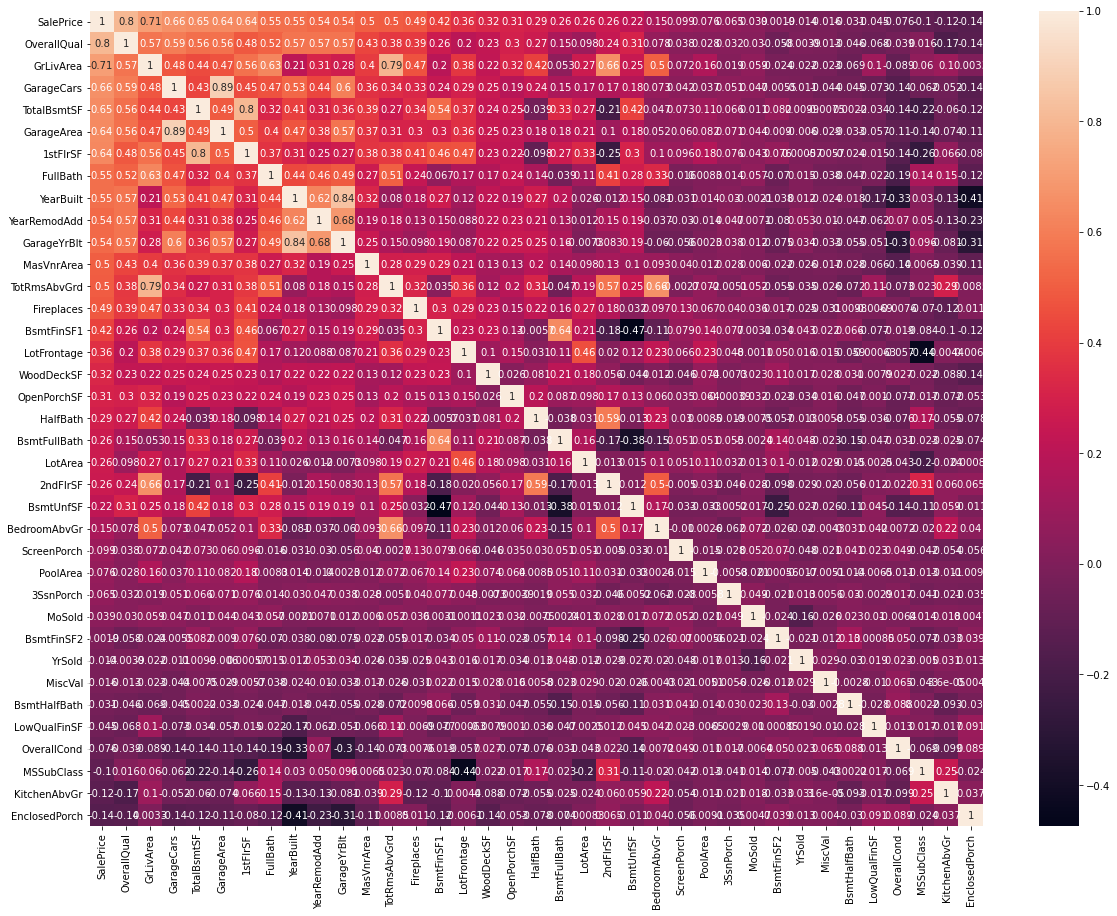

In [1349]:
corr=train.corr()
top_corr=train[corr.nlargest(40,'SalePrice')['SalePrice'].index].corr()
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1)

In [1350]:
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>=0.3]
top_corr_features

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

# 이상치 제거

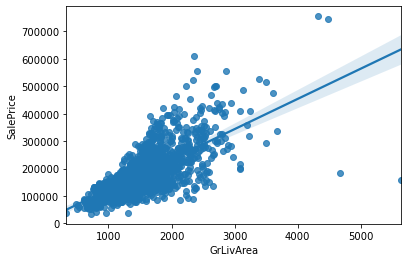

In [1351]:
sns.regplot(train['GrLivArea'], train['SalePrice'])

In [1352]:
train=train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

# 결측치 채우기
 - 오브젝트 타입은 최빈값
 - 수치형 타입은 중간값, 혹은 최빈값으로 채웠음

In [1353]:
test['Utilities'].value_counts()

AllPub    1166
NoSeWa       1
Name: Utilities, dtype: int64

In [1354]:
train['Utilities'].value_counts()

AllPub    1748
Name: Utilities, dtype: int64

In [1355]:
train['Utilities'].fillna('AllPub', inplace = True)
test['Utilities'].fillna('AllPub', inplace = True)

In [1356]:
train['MasVnrType'].value_counts()

None       1044
BrkFace     519
Stone       156
BrkCmn       13
Name: MasVnrType, dtype: int64

In [1357]:
test['MasVnrType'].value_counts()

None       698
BrkFace    360
Stone       91
BrkCmn      12
Name: MasVnrType, dtype: int64

In [1358]:
train['MasVnrType'].fillna('None', inplace = True)
test['MasVnrType'].fillna('None', inplace = True)

In [1359]:
train['BsmtQual'].value_counts()

TA    772
Gd    713
Ex    155
Fa     56
Name: BsmtQual, dtype: int64

In [1360]:
test['BsmtQual'].value_counts()

TA    511
Gd    496
Ex    101
Fa     32
Name: BsmtQual, dtype: int64

In [1361]:
train['BsmtQual'].fillna('TA', inplace = True)
test['BsmtQual'].fillna('TA', inplace = True)

In [1362]:
train['BsmtCond'].value_counts()

TA    1547
Gd      77
Fa      68
Po       2
Name: BsmtCond, dtype: int64

In [1363]:
test['BsmtCond'].value_counts()

TA    1057
Gd      45
Fa      36
Po       3
Name: BsmtCond, dtype: int64

In [1364]:
train['BsmtCond'].fillna('TA', inplace = True)
test['BsmtCond'].fillna('TA', inplace = True)

In [1365]:
train['BsmtExposure'].value_counts()

No    1142
Av     257
Gd     156
Mn     141
Name: BsmtExposure, dtype: int64

In [1366]:
test['BsmtExposure'].value_counts()

No    762
Av    161
Gd    118
Mn     98
Name: BsmtExposure, dtype: int64

In [1367]:
train['BsmtExposure'].fillna('No', inplace = True)
test['BsmtExposure'].fillna('No', inplace = True)

In [1368]:
train['BsmtFinType1'].value_counts()

Unf    508
GLQ    501
ALQ    250
Rec    182
BLQ    169
LwQ     87
Name: BsmtFinType1, dtype: int64

In [1369]:
test['BsmtFinType1'].value_counts()

GLQ    346
Unf    343
ALQ    179
Rec    106
BLQ    100
LwQ     67
Name: BsmtFinType1, dtype: int64

In [1370]:
train['BsmtFinType1'].fillna('Unf', inplace = True)
test['BsmtFinType1'].fillna('GLQ', inplace = True)

In [1371]:
train['BsmtFinType2'].value_counts()

Unf    1497
Rec      64
LwQ      50
BLQ      42
ALQ      31
GLQ      13
Name: BsmtFinType2, dtype: int64

In [1372]:
test['BsmtFinType2'].value_counts()

Unf    994
Rec     41
LwQ     37
BLQ     26
GLQ     21
ALQ     21
Name: BsmtFinType2, dtype: int64

In [1373]:
train['BsmtFinType2'].fillna('Unf', inplace = True)
test['BsmtFinType2'].fillna('Unf', inplace = True)

In [1374]:
train['FireplaceQu'].value_counts()

Gd    436
TA    364
Fa     42
Po     26
Ex     22
Name: FireplaceQu, dtype: int64

In [1375]:
test['FireplaceQu'].value_counts()

Gd    306
TA    228
Fa     32
Ex     21
Po     20
Name: FireplaceQu, dtype: int64

In [1376]:
train['FireplaceQu'].fillna('Gd', inplace = True)
test['FireplaceQu'].fillna('Gd', inplace = True)

In [1377]:
train['GarageType'].value_counts()

Attchd     1039
Detchd      466
BuiltIn      99
Basment      22
2Types       14
CarPort      10
Name: GarageType, dtype: int64

In [1378]:
test['GarageType'].value_counts()

Attchd     683
Detchd     313
BuiltIn     86
Basment     14
2Types       9
CarPort      5
Name: GarageType, dtype: int64

In [1379]:
train['GarageType'].fillna('Attchd', inplace = True)
test['GarageType'].fillna('Attchd', inplace = True)

In [1380]:
train['GarageFinish'].value_counts()

Unf    736
RFn    479
Fin    434
Name: GarageFinish, dtype: int64

In [1381]:
test['GarageFinish'].value_counts()

Unf    494
RFn    332
Fin    283
Name: GarageFinish, dtype: int64

In [1382]:
train['GarageFinish'].fillna('Unf', inplace = True)
test['GarageFinish'].fillna('Unf', inplace = True)

In [1383]:
train['GarageQual'].value_counts()

TA    1559
Fa      72
Gd      12
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [1384]:
test['GarageQual'].value_counts()

TA    1043
Fa      52
Gd      12
Po       2
Name: GarageQual, dtype: int64

In [1385]:
train['GarageQual'].fillna('TA', inplace = True)
test['GarageQual'].fillna('TA', inplace = True)

In [1386]:
train['GarageCond'].value_counts()

TA    1581
Fa      48
Gd      10
Po       7
Ex       3
Name: GarageCond, dtype: int64

In [1387]:
test['GarageCond'].value_counts()

TA    1071
Fa      26
Po       7
Gd       5
Name: GarageCond, dtype: int64

In [1388]:
train['GarageCond'].fillna('TA', inplace = True)
test['GarageCond'].fillna('TA', inplace = True)

In [1389]:
test['Exterior1st'].value_counts()

VinylSd    418
Wd Sdng    175
HdBoard    175
MetalSd    167
Plywood     80
CemntBd     54
BrkFace     42
WdShing     20
Stucco      17
AsbShng     14
BrkComm      3
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64

In [1390]:
test['Exterior1st'].fillna('VinylSd', inplace = True)

In [1391]:
test['Exterior2nd'].value_counts()

VinylSd    412
Wd Sdng    176
MetalSd    164
HdBoard    158
Plywood    101
CmentBd     53
Wd Shng     27
BrkFace     23
Stucco      18
AsbShng     14
Brk Cmn      8
ImStucc      7
Stone        3
AsphShn      3
Name: Exterior2nd, dtype: int64

In [1392]:
test['Exterior2nd'].fillna('VinylSd', inplace = True)

In [1393]:
test['KitchenQual'].value_counts()

TA    580
Gd    472
Ex     83
Fa     32
Name: KitchenQual, dtype: int64

In [1394]:
test['KitchenQual'].fillna('TA', inplace = True)

In [1395]:
test['SaleType'].value_counts()

WD       1004
New        94
COD        40
ConLD      14
CWD         5
Oth         3
Con         3
ConLw       2
ConLI       2
Name: SaleType, dtype: int64

In [1396]:
test['SaleType'].fillna('WD', inplace = True)

In [1397]:
train['MSZoning'].value_counts()

RL         1361
RM          276
FV           77
RH           17
C (all)      14
Name: MSZoning, dtype: int64

In [1398]:
train['MSZoning'].fillna('RL', inplace = True)

In [1399]:
train['Electrical'].value_counts()

SBrkr    1599
FuseA     104
FuseF      40
FuseP       4
Mix         1
Name: Electrical, dtype: int64

In [1400]:
train['Electrical'].fillna('SBrkr', inplace = True)

In [1401]:
train['Functional'].value_counts()

Typ     1627
Min2      47
Min1      39
Maj1      13
Mod       12
Maj2       7
Sev        2
Name: Functional, dtype: int64

In [1402]:
train['Functional'].fillna('Typ', inplace = True)

In [1403]:
train['BsmtUnfSF'].value_counts()

0.0       157
384.0      10
270.0       8
324.0       7
624.0       7
         ... 
863.0       1
418.0       1
581.0       1
1491.0      1
1074.0      1
Name: BsmtUnfSF, Length: 873, dtype: int64

In [1404]:
train['BsmtUnfSF'].fillna(461.0, inplace = True)

In [1405]:
train['BsmtFullBath'].value_counts()

0.0    1045
1.0     682
2.0      20
3.0       1
Name: BsmtFullBath, dtype: int64

In [1406]:
train['BsmtFullBath'].fillna(0.0, inplace = True)

In [1407]:
test['BsmtFullBath'].value_counts()

0.0    660
1.0    489
2.0     17
3.0      1
Name: BsmtFullBath, dtype: int64

In [1408]:
test['BsmtFullBath'].fillna(0.0, inplace = True)

In [1409]:
train['BsmtUnfSF'].value_counts()

0.0       157
384.0      10
270.0       8
324.0       7
624.0       7
         ... 
863.0       1
418.0       1
581.0       1
1491.0      1
1074.0      1
Name: BsmtUnfSF, Length: 873, dtype: int64

In [1410]:
train['BsmtUnfSF'].fillna(461.0, inplace = True)

In [1411]:
train['GarageYrBlt'].value_counts()

2005.0    80
2006.0    67
2004.0    65
2007.0    63
2003.0    55
          ..
1908.0     1
1923.0     1
1943.0     1
1929.0     1
1919.0     1
Name: GarageYrBlt, Length: 99, dtype: int64

In [1412]:
train['GarageYrBlt'].fillna(0, inplace = True)

In [1413]:
test['GarageYrBlt'].value_counts()

2005.0    62
2007.0    51
2006.0    48
2003.0    37
2004.0    34
          ..
1895.0     1
1937.0     1
1931.0     1
1929.0     1
1933.0     1
Name: GarageYrBlt, Length: 95, dtype: int64

In [1414]:
test['GarageYrBlt'].fillna(0, inplace = True)

In [1415]:
train['GarageCars'].value_counts()

2.0    953
1.0    459
3.0    228
0.0     99
4.0      8
5.0      1
Name: GarageCars, dtype: int64

In [1416]:
train['GarageCars'].fillna(2.0, inplace = True)

In [1417]:
train['GarageArea'].value_counts()

0.0      99
576.0    64
440.0    63
240.0    41
528.0    39
         ..
739.0     1
355.0     1
213.0     1
936.0     1
613.0     1
Name: GarageArea, Length: 497, dtype: int64

In [1418]:
train['GarageArea'].fillna(480.0, inplace = True)

In [1419]:
train['MasVnrArea'].value_counts()

0.0       1040
176.0        9
180.0        9
216.0        9
108.0        9
          ... 
283.0        1
674.0        1
327.0        1
372.0        1
1031.0       1
Name: MasVnrArea, Length: 340, dtype: int64

In [1420]:
train['MasVnrArea'].fillna(0.0, inplace = True)

In [1421]:
test['MasVnrArea'].value_counts()

0.0      698
120.0      8
200.0      7
16.0       6
144.0      5
        ... 
970.0      1
766.0      1
451.0      1
653.0      1
294.0      1
Name: MasVnrArea, Length: 273, dtype: int64

In [1422]:
test['MasVnrArea'].fillna(0.0, inplace = True)

In [1423]:
train['TotalBsmtSF'].value_counts()

0.0       51
864.0     50
672.0     17
912.0     17
816.0     15
          ..
279.0      1
661.0      1
1555.0     1
1765.0     1
2458.0     1
Name: TotalBsmtSF, Length: 819, dtype: int64

In [1424]:
train['TotalBsmtSF'].fillna(980.0, inplace = True)

In [1425]:
train['BsmtFinSF1'].value_counts()

0.0       559
24.0       15
16.0        7
288.0       6
384.0       6
         ... 
506.0       1
85.0        1
198.0       1
1004.0      1
808.0       1
Name: BsmtFinSF1, Length: 748, dtype: int64

In [1426]:
train['BsmtFinSF1'].fillna(369.0, inplace = True)

In [1427]:
train['BsmtFinSF2'].value_counts()

0.0      1548
180.0       4
483.0       3
147.0       3
374.0       3
         ... 
276.0       1
620.0       1
119.0       1
154.0       1
441.0       1
Name: BsmtFinSF2, Length: 167, dtype: int64

In [1428]:
train['BsmtFinSF2'].fillna(0.0, inplace = True)

In [1429]:
train['LotFrontage'].value_counts()

60.0     171
80.0      84
70.0      78
50.0      73
65.0      57
        ... 
313.0      1
138.0      1
200.0      1
28.0       1
136.0      1
Name: LotFrontage, Length: 115, dtype: int64

In [1430]:
train['LotFrontage'].fillna(68.0, inplace = True)

In [1431]:
test['LotFrontage'].value_counts()

60.0     105
70.0      55
80.0      53
75.0      52
50.0      44
        ... 
133.0      1
168.0      1
140.0      1
46.0       1
152.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [1432]:
test['LotFrontage'].fillna(68.0, inplace = True)

In [1433]:
train['BsmtHalfBath'].value_counts()

0.0    1647
1.0      98
2.0       3
Name: BsmtHalfBath, dtype: int64

In [1434]:
test['BsmtHalfBath'].value_counts()

0.0    1093
1.0      73
2.0       1
Name: BsmtHalfBath, dtype: int64

In [1435]:
train['BsmtHalfBath'].fillna(0.0, inplace = True)
test['BsmtHalfBath'].fillna(0.0, inplace = True)

# 필요없는 칼럼 버리기
- 결측치가 너무 많은 값
- 상관계수가 너무 적은 값
- 비정상적으로 빈 값이 많은 값

In [1436]:
train=train.drop(columns=['Street','Utilities','Condition2','RoofMatl','Heating','PoolArea','PoolQC','MiscVal','MiscFeature','Alley','Fence'])

In [1437]:
test=test.drop(columns=['Street','Utilities','Condition2','RoofMatl','Heating','PoolArea','PoolQC','MiscVal','MiscFeature','Alley','Fence'])

# 칼럼 합치기
- 공통적인 특성이 있는 컬럼들을 합쳐 새로운 특성을 만듦

#### 지하실, 1층, 2층 면적을 합한 총 면적 변수

In [1438]:
test['TotalSF']=test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
test['No2ndFlr']=(test['2ndFlrSF']==0)
test['NoBsmt']=(test['TotalBsmtSF']==0)

In [1439]:
train['TotalSF']=train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train['No2ndFlr']=(train['2ndFlrSF']==0)
train['NoBsmt']=(train['TotalBsmtSF']==0)

#### 총 욕실수

In [1440]:
test['TotalBath']=test['BsmtFullBath'] + test['FullBath'] + (test['BsmtHalfBath']/2) + (test['HalfBath']/2)
train['TotalBath']=train['BsmtFullBath'] + train['FullBath'] + (train['BsmtHalfBath']/2) + (train['HalfBath']/2)

#### 건축연도, 리모델링연도

In [1441]:
test['YrBltAndRemod']=test['YearBuilt']+test['YearRemodAdd']
train['YrBltAndRemod']=train['YearBuilt']+train['YearRemodAdd']

In [1442]:
# MSSubClass는 숫자이면서 범주형 칼럼이다, 그래서 문자열로 바꾸어 주었다
test['MSSubClass']=test['MSSubClass'].astype(str)
test['MoSold']=test['MoSold'].astype(str)
test['YrSold']=test['YrSold'].astype(str)

train['MSSubClass']=train['MSSubClass'].astype(str)
train['MoSold']=train['MoSold'].astype(str)
train['YrSold']=train['YrSold'].astype(str)

#### 지하실 특성

In [1443]:
# 비슷한 특성을 지닌 칼럼들을 하나로 합쳐주었다
Basement = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']
Bsmt=test[Basement]

In [1444]:
# 합쳐준 데이터들을 인코딩
Bsmt=Bsmt.replace(to_replace='Po', value=1)
Bsmt=Bsmt.replace(to_replace='Fa', value=2)
Bsmt=Bsmt.replace(to_replace='TA', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)
Bsmt=Bsmt.replace(to_replace='Ex', value=5)
Bsmt=Bsmt.replace(to_replace='None', value=0)

Bsmt=Bsmt.replace(to_replace='No', value=1)
Bsmt=Bsmt.replace(to_replace='Mn', value=2)
Bsmt=Bsmt.replace(to_replace='Av', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)

Bsmt=Bsmt.replace(to_replace='Unf', value=1)
Bsmt=Bsmt.replace(to_replace='LwQ', value=2)
Bsmt=Bsmt.replace(to_replace='Rec', value=3)
Bsmt=Bsmt.replace(to_replace='BLQ', value=4)
Bsmt=Bsmt.replace(to_replace='ALQ', value=5)
Bsmt=Bsmt.replace(to_replace='GLQ', value=6)

In [1445]:
# 몇개의 항목을 곱해 'BsmtScore' 칼럼을 새로 만들어 지하실 상태를 알 수 있게 만들었다
Bsmt['BsmtScore']= Bsmt['BsmtQual']  * Bsmt['BsmtCond'] * Bsmt['TotalBsmtSF']
test['BsmtScore']=Bsmt['BsmtScore']

Bsmt['BsmtFin'] = (Bsmt['BsmtFinSF1'] * Bsmt['BsmtFinType1']) + (Bsmt['BsmtFinSF2'] * Bsmt['BsmtFinType2'])
test['BsmtFinScore']=Bsmt['BsmtFin']
test['BsmtDNF']=(test['BsmtFinScore']==0)

##### train데이터도 같은 작업을 해준다

In [1446]:
Basement = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']
Bsmt=train[Basement]

In [1447]:
Bsmt=Bsmt.replace(to_replace='Po', value=1)
Bsmt=Bsmt.replace(to_replace='Fa', value=2)
Bsmt=Bsmt.replace(to_replace='TA', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)
Bsmt=Bsmt.replace(to_replace='Ex', value=5)
Bsmt=Bsmt.replace(to_replace='None', value=0)

Bsmt=Bsmt.replace(to_replace='No', value=1)
Bsmt=Bsmt.replace(to_replace='Mn', value=2)
Bsmt=Bsmt.replace(to_replace='Av', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)

Bsmt=Bsmt.replace(to_replace='Unf', value=1)
Bsmt=Bsmt.replace(to_replace='LwQ', value=2)
Bsmt=Bsmt.replace(to_replace='Rec', value=3)
Bsmt=Bsmt.replace(to_replace='BLQ', value=4)
Bsmt=Bsmt.replace(to_replace='ALQ', value=5)
Bsmt=Bsmt.replace(to_replace='GLQ', value=6)

In [1448]:
Bsmt['BsmtScore']= Bsmt['BsmtQual']  * Bsmt['BsmtCond'] * Bsmt['TotalBsmtSF']
train['BsmtScore']=Bsmt['BsmtScore']

Bsmt['BsmtFin'] = (Bsmt['BsmtFinSF1'] * Bsmt['BsmtFinType1']) + (Bsmt['BsmtFinSF2'] * Bsmt['BsmtFinType2'])
train['BsmtFinScore']=Bsmt['BsmtFin']
train['BsmtDNF']=(train['BsmtFinScore']==0)

#### 토지

In [1449]:
lot=['LotFrontage', 'LotArea','LotConfig','LotShape']
Lot=train[lot]

Lot['LotScore'] = np.log((Lot['LotFrontage'] * Lot['LotArea'])+1)

train['LotScore']=Lot['LotScore']

<ipython-input-1449-2eef8d650a74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lot['LotScore'] = np.log((Lot['LotFrontage'] * Lot['LotArea'])+1)


In [1450]:
lot=['LotFrontage', 'LotArea','LotConfig','LotShape']
Lot=test[lot]

Lot['LotScore'] = np.log((Lot['LotFrontage'] * Lot['LotArea'])+1)

test['LotScore']=Lot['LotScore']

<ipython-input-1450-95d6b9771cbe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lot['LotScore'] = np.log((Lot['LotFrontage'] * Lot['LotArea'])+1)


#### 차고

In [1451]:
# 차고 점수도 지하실과 같은 방식으로 만들어 주었다.
garage=['GarageArea','GarageCars','GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt']
Garage=test[garage]
test['NoGarage']=(test['GarageArea']==0)

In [1452]:
Garage=Garage.replace(to_replace='Po', value=1)
Garage=Garage.replace(to_replace='Fa', value=2)
Garage=Garage.replace(to_replace='TA', value=3)
Garage=Garage.replace(to_replace='Gd', value=4)
Garage=Garage.replace(to_replace='Ex', value=5)
Garage=Garage.replace(to_replace='None', value=0)

Garage=Garage.replace(to_replace='Unf', value=1)
Garage=Garage.replace(to_replace='RFn', value=2)
Garage=Garage.replace(to_replace='Fin', value=3)

Garage=Garage.replace(to_replace='CarPort', value=1)
Garage=Garage.replace(to_replace='Basment', value=4)
Garage=Garage.replace(to_replace='Detchd', value=2)
Garage=Garage.replace(to_replace='2Types', value=3)
Garage=Garage.replace(to_replace='Basement', value=5)
Garage=Garage.replace(to_replace='Attchd', value=6)
Garage=Garage.replace(to_replace='BuiltIn', value=7)
Garage['GarageScore']=(Garage['GarageArea']) * (Garage['GarageCars']) * (Garage['GarageFinish']) * (Garage['GarageQual']) * (Garage['GarageType'])
test['GarageScore']=Garage['GarageScore']

In [1453]:
garage=['GarageArea','GarageCars','GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt']
Garage=train[garage]
train['NoGarage']=(train['GarageArea']==0)

In [1454]:
Garage=Garage.replace(to_replace='Po', value=1)
Garage=Garage.replace(to_replace='Fa', value=2)
Garage=Garage.replace(to_replace='TA', value=3)
Garage=Garage.replace(to_replace='Gd', value=4)
Garage=Garage.replace(to_replace='Ex', value=5)
Garage=Garage.replace(to_replace='None', value=0)

Garage=Garage.replace(to_replace='Unf', value=1)
Garage=Garage.replace(to_replace='RFn', value=2)
Garage=Garage.replace(to_replace='Fin', value=3)

Garage=Garage.replace(to_replace='CarPort', value=1)
Garage=Garage.replace(to_replace='Basment', value=4)
Garage=Garage.replace(to_replace='Detchd', value=2)
Garage=Garage.replace(to_replace='2Types', value=3)
Garage=Garage.replace(to_replace='Basement', value=5)
Garage=Garage.replace(to_replace='Attchd', value=6)
Garage=Garage.replace(to_replace='BuiltIn', value=7)
Garage['GarageScore']=(Garage['GarageArea']) * (Garage['GarageCars']) * (Garage['GarageFinish']) * (Garage['GarageQual']) * (Garage['GarageType'])
train['GarageScore']=Garage['GarageScore']

In [1455]:
# 0이 많은 값중 쓸모 있는 값들 0만 분리
test['NoLowQual']=(test['LowQualFinSF']==0)
test['NoOpenPorch']=(test['OpenPorchSF']==0)
test['NoWoodDeck']=(test['WoodDeckSF']==0)

In [1456]:
train['NoLowQual']=(train['LowQualFinSF']==0)
train['NoOpenPorch']=(train['OpenPorchSF']==0)
train['NoWoodDeck']=(train['WoodDeckSF']==0)

In [1457]:
print(train.shape, test.shape)

(1749, 83) (1168, 82)


# 오브젝트형, 수치형 분리

In [1458]:
test_obj_df = test.select_dtypes(include='object')
train_obj_df = train.select_dtypes(include='object')
train_index = train.index
test_index = test.index

# 원 핫 인코딩
- 범주형 데이터를 수치형으로 바꾸기 위해 원 핫 인코딩을 하였다.

In [1460]:
train_dummy_df = pd.get_dummies(train_obj_df, drop_first=True)
train_dummy_df.index = train.index
train_dummy_df.head()

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [1461]:
test_dummy_df = pd.get_dummies(test_obj_df, drop_first=True)
test_dummy_df.index = test.index
test_dummy_df.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1752,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1753,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1754,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1755,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1756,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [1462]:
test_data_df = test.select_dtypes(exclude='object')
train_data_df = train.select_dtypes(exclude='object')
train_index = train.index
test_index = test.index

#### 칼럼의 갯수가 다르길래 train에서 test를 빼보고, 반대로도 해보았다 이때 실수 한 것을 깨달았다..위에서 인코딩을 했었는데 한번 더 하려고 하니 당연히 칼럼의 갯수도 달라지고 꼬였던 것이었다. 그래서 다시 아래처럼 인코딩 한 것을 삭제하고 원 핫 인코딩을 하려고 했지만 문법은 틀리지 않았는데 실행하면 오류가 났다
#### train_obj_df=train_obj_df.drop(['NoBsmt','TotalBath','MSSubClass','MoSold','YrSold','BsmtDNF','LotScore','NoGarage','GarageScore', axis = 1])
#### 그래서 급한대로 결측치를 확인하고(다행히 대부분 0이었다) 비어있는 칼럼들을 서로 만들어서 채워줬다.


In [1463]:
train = pd.concat([train_dummy_df,train_data_df], axis=1)

In [1464]:
test = pd.concat([test_dummy_df,test_data_df], axis=1)

In [1465]:
set(train.columns) - set(test.columns)

{'Electrical_Mix',
 'ExterCond_Po',
 'Exterior1st_CBlock',
 'Exterior1st_Stone',
 'Exterior2nd_CBlock',
 'Exterior2nd_Other',
 'Functional_Sev',
 'GarageCond_Fa',
 'GarageQual_Fa',
 'MSSubClass_150',
 'SalePrice'}

In [1466]:
train_dummy_df['MSSubClass_150'].value_counts()

0    1748
1       1
Name: MSSubClass_150, dtype: int64

In [1467]:
train_dummy_df['ExterCond_Po'].value_counts()

0    1746
1       3
Name: ExterCond_Po, dtype: int64

In [1468]:
train_dummy_df['Electrical_Mix'].value_counts()

0    1748
1       1
Name: Electrical_Mix, dtype: int64

In [1469]:
train_dummy_df['Exterior1st_CBlock'].value_counts()

0    1747
1       2
Name: Exterior1st_CBlock, dtype: int64

In [1470]:
train_dummy_df['Exterior1st_Stone'].value_counts()

0    1747
1       2
Name: Exterior1st_Stone, dtype: int64

In [1471]:
train_dummy_df['Exterior2nd_CBlock'].value_counts()

0    1746
1       3
Name: Exterior2nd_CBlock, dtype: int64

In [1472]:
train_dummy_df['Exterior2nd_Other'].value_counts()

0    1748
1       1
Name: Exterior2nd_Other, dtype: int64

In [1473]:
train_dummy_df['Functional_Sev'].value_counts()

0    1747
1       2
Name: Functional_Sev, dtype: int64

In [1474]:
train_dummy_df['GarageCond_Fa'].value_counts()

0    1701
1      48
Name: GarageCond_Fa, dtype: int64

In [1475]:
train_dummy_df['GarageQual_Fa'].value_counts()

0    1677
1      72
Name: GarageQual_Fa, dtype: int64

In [1476]:
set(test.columns) - set(train.columns)

{'Exterior1st_ImStucc'}

In [1477]:
test['Electrical_Mix'] = 0
test['ExterCond_Po'] = 0
test['Exterior1st_CBlock'] = 0
test['Exterior1st_Stone'] = 0
test['Exterior2nd_CBlock'] = 0
test['Exterior2nd_Other'] = 0
test['Functional_Sev'] = 0
test['GarageCond_Fa'] = 0
test['GarageQual_Fa'] = 0
test['MSSubClass_150'] = 0

In [1478]:
train['Exterior1st_ImStucc'] = 0

In [1479]:
train.sort_index(axis=1, inplace=True)
test.sort_index(axis=1,inplace=True)

In [1480]:
X = train.drop(['SalePrice'], axis = 1)
y = train["SalePrice"]
# 데이터가 왼쪽으로 치우친 Left Skewed이기 때문에 로그를 취하여 비대칭도를 줄였다
y = np.log(y+1)

In [1481]:
submission = pd.DataFrame()

#### 5~6 모델 선택 및 학습, 평가
- GradientBoosting
- XGBRegressor
- ElasticNet, Lasso
- 3개 모델 합쳐서 계산


#### 단일모델로도 돌려보았었는데 결과가 좋지 않았다, 그래서 검색 후 여러 모델의 예측값의 평균값이 더 정확하다하여 돌려보았다. 참고로 회귀가 아닌 분류의 경우 Regressor대신 Classifier으로 import해야 한다.

In [1482]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from xgboost import XGBRegressor
import time
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
model_ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00052, l1_ratio=0.70654, random_state=18))

model_GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                         min_samples_split=10, loss='huber', random_state=18)

model_XGB=XGBRegressor(colsample_bylevel=0.9229733609038979,colsample_bynode=0.21481791874780318,colsample_bytree=0.607964318297635, 
                       gamma=0.8989889254961725, learning_rate=0.009192310189734834, max_depth=3, n_estimators=3602, 
                       reg_alpha=3.185674564163364e-12,reg_lambda=4.95553539265423e-13, seed=18, subsample=0.8381904293270576,
                       tree_method='exact',verbosity=0)

In [1483]:
model_ENet.fit(X, y)
ENet_predictions=model_ENet.predict(test)
train_ENet=model_ENet.predict(X)

model_XGB = XGBRegressor()
model_XGB.fit(X, y)
XGB_predictions=model_XGB.predict(test)
train_XGB=model_XGB.predict(X)

model_GBoost.fit(X, y)
GBoost_predictions=model_GBoost.predict(test)
train_GBoost=model_GBoost.predict(X)

In [1484]:
log_train_predictions = (train_ENet + train_XGB + train_GBoost)/3
RMSE = mean_squared_error(y,log_train_predictions)**0.5
train_score=RMSE
print(f"Scoring with train data : {train_score}")

Scoring with train data : 0.039592836371444826


In [1485]:
log_predictions=(ENet_predictions + XGB_predictions + GBoost_predictions) / 3
predictions=np.exp(log_predictions)-1

In [ ]:
# 제출 파일 만들기
submission['SalePrice']=predictions
submission['Id']=test.index
submission.to_csv('Result.csv', index=False)

#### 추가적으로 catboost가 점수가 잘 나올 수도 있다하여 이 모델도 돌려보았다

# catboost

In [ ]:
from catboost import CatBoostRegressor, Pool

In [ ]:
model_CB = CatBoostRegressor()
model_CB.fit(X,y)
CB_predictions = model_CB.predict(test)
train_Cb = model_CB.predict(X)

In [ ]:
log_train_predictions = train_Cb
RMSE = mean_squared_error(y,log_train_predictions)**0.5
train_score=RMSE
print(f"Scoring with train data : {train_score}")

In [ ]:
log_predictions=CB_predictions
predictions=np.exp(log_predictions)-1

In [ ]:
submission['SalePrice']=predictions
submission['Id']=test.index
submission.to_csv('CB.csv', index=False)

# Install 필요할 시 사용
- !pip install optuna
- !pip install catboost
- !pip install lightgbm

# 프로젝트 하면서 데이터 분석한 내용

In [ ]:
- 상관계수 0.5 기준
OverallQual      0.803108
YearBuilt        0.551999
YearRemodAdd     0.539269
* MasVnrArea       0.503970 /1735/1161
* TotalBsmtSF      0.647987 /1750
1stFlrSF         0.637123
GrLivArea        0.709685
FullBath         0.553401
* GarageYrBlt      0.538430 /1651
* GarageCars       0.661647 /1750
* GarageArea       0.642899   /1750
==============================================================================================
- 상관계수 0.3 기준
OverallQual      0.803108
YearBuilt        0.551999
YearRemodAdd     0.539269
* MasVnrArea       0.503970 /1735/1161
* TotalBsmtSF      0.647987 /1750
1stFlrSF         0.637123
GrLivArea        0.709685
FullBath         0.553401
* GarageYrBlt      0.538430 /1651
* GarageCars       0.661647 /1750
* GarageArea       0.642899   /1750

*BsmtFinSF1       0.420841 1750/1751 float64
*LotFrontage      0.358583 1450/1751 float64
TotRmsAbvGrd     0.498221
Fireplaces       0.485241
WoodDeckSF       0.324476
OpenPorchSF      0.307070
===================================================
- 상관계수 0.2 기준
OverallQual      0.803108
YearBuilt        0.551999
YearRemodAdd     0.539269
* MasVnrArea       0.503970 /1735/1161
* TotalBsmtSF      0.647987 /1750
1stFlrSF         0.637123
GrLivArea        0.709685
FullBath         0.553401
* GarageYrBlt      0.538430 /1651
* GarageCars       0.661647 /1750
* GarageArea       0.642899   /1750

*BsmtFinSF1       0.420841 1750/1751 float64
*LotFrontage      0.358583 1450/1751 float64
TotRmsAbvGrd     0.498221
Fireplaces       0.485241
WoodDeckSF       0.324476
OpenPorchSF      0.307070

LotArea          0.264751
* BsmtUnfSF        0.217641 1750/1751  float64
2ndFlrSF         0.262407
* BsmtFullBath     0.264883 1750/1751  float64
HalfBath         0.288713
==============================================================================================
결측치 없는 컬럼
 3   LotArea        1751 non-null   int64  
 4   Street         1751 non-null   object 
 6   LotShape       1751 non-null   object 
 7   LandContour    1751 non-null   object 
 9   LotConfig      1751 non-null   object 
 10  LandSlope      1751 non-null   object 
 11  Neighborhood   1751 non-null   object 
 12  Condition1     1751 non-null   object 
 13  Condition2     1751 non-null   object 
 14  BldgType       1751 non-null   object 
 15  HouseStyle     1751 non-null   object 
 16  OverallQual    1751 non-null   int64  
 17  OverallCond    1751 non-null   int64  
 18  YearBuilt      1751 non-null   int64  
 19  YearRemodAdd   1751 non-null   int64  
 20  RoofStyle      1751 non-null   object 
 21  RoofMatl       1751 non-null   object 
 26  ExterQual      1751 non-null   object 
 27  ExterCond      1751 non-null   object 
 28  Foundation     1751 non-null   object 
 38  Heating        1751 non-null   object 
 39  HeatingQC      1751 non-null   object 
 40  CentralAir     1751 non-null   object 
 42  1stFlrSF       1751 non-null   int64  
 43  2ndFlrSF       1751 non-null   int64  
 44  LowQualFinSF   1751 non-null   int64  
 45  GrLivArea      1751 non-null   int64  
 48  FullBath       1751 non-null   int64  
 49  HalfBath       1751 non-null   int64  
 50  BedroomAbvGr   1751 non-null   int64  
 51  KitchenAbvGr   1751 non-null   int64  
 53  TotRmsAbvGrd   1751 non-null   int64  
 55  Fireplaces     1751 non-null   int64  
 64  PavedDrive     1751 non-null   object 
 65  WoodDeckSF     1751 non-null   int64  
 66  OpenPorchSF    1751 non-null   int64  
 67  EnclosedPorch  1751 non-null   int64  
 68  3SsnPorch      1751 non-null   int64  
 69  ScreenPorch    1751 non-null   int64  
 70  PoolArea       1751 non-null   int64  
 74  MiscVal        1751 non-null   int64  
 75  MoSold         1751 non-null   int64  
 76  YrSold         1751 non-null   int64  
 78  SaleCondition  1751 non-null   object 
==============================================================================================
SalePrice- 부동산의 판매 가격 (달러)입니다. 이것이 예측하려는 목표 변수입니다.
MSSubClass : 건물 등급
MSZoning : 일반 구역 분류
LotFrontage : 부동산에 연결된 거리의 선형 피트
LotArea : 평방 피트 단위의 부지 크기
거리 : 도로 접근 유형
골목 : 골목 접근 유형
LotShape : 속성의 일반적인 모양
LandContour : 부동산의 평탄도
유틸리티 : 사용 가능한 유틸리티 유형
LotConfig : 로트 구성
LandSlope : 부동산의 경사
지역 : 에임스시 경계 내의 물리적 위치
조건 1 : 주요 도로 또는 철도와의 근접성
조건 2 : 주요 도로 또는 철도와의 근접성 (초가있는 경우)
BldgType : 주거 형태
HouseStyle : 주거 스타일
OverallQual : 전체 재료 및 마감 품질
OverallCond : 전체 상태 등급
준공 연도 : 원래 공사 일
YearRemodAdd : 리모델링 날짜
RoofStyle : 지붕 유형
RoofMatl : 지붕 재료
Exterior1st : 주택 외장재
외장 2 차 : 주택 외장재 (하나 이상인 경우)
MasVnrType : 조적 베니어 유형
MasVnrArea : 벽돌 베니어 면적 (평방 피트)
ExterQual : 외장재 품질
ExterCond : 외장재의 현황
기초 : 기초 유형
BsmtQual : 지하 높이
BsmtCond : 지하실 개황
BsmtExposure : 워크 아웃 또는 정원 수준의 지하 벽
BsmtFinType1 : 지하 마감면의 품질
BsmtFinSF1 : 유형 1 완성 된 평방 피트
BsmtFinType2 : 두 번째 완성 된 영역의 품질 (있는 경우)
BsmtFinSF2 : 유형 2 완성 된 평방 피트
BsmtUnfSF : 미완성 된 지하실 면적
TotalBsmtSF : 지하 총 평방 피트
난방 : 난방의 종류
HeatingQC : 난방 품질 및 상태
CentralAir : 중앙 에어컨
전기 : 전기 시스템
1stFlrSF : 1 층 평방 피트
2ndFlrSF : 2 층 평방 피트
LowQualFinSF : 저품질 마감 평방 피트 (모든 층)
GrLivArea : 지상 (지상) 거실 면적 평방 피트
BsmtFullBath : 지하 전체 욕실
BsmtHalfBath : 지하 반 욕실
FullBath : 등급 이상의 전체 욕실
HalfBath : 지상 절반의 목욕
침실 : 지하층 이상의 침실 수
주방 : 주방 수
KitchenQual : 주방 품질
TotRmsAbvGrd : 학년 이상의 총 방 (화장실 제외)
기능 : 홈 기능 등급
벽난로 : 벽난로 수
FireplaceQu : 벽난로 품질
GarageType : 차고 위치
GarageYrBlt : 차고 건설 연도
GarageFinish : 차고 내부 마감
GarageCars : 차량 수용 가능 차고 크기
GarageArea : 차고의 크기 (평방 피트)
GarageQual : 차고 품질
GarageCond : 차고 상태
PavedDrive : 포장 된 진입로
WoodDeckSF : 목재 데크 면적 (평방 피트)
OpenPorchSF : 평방 피트 단위의 오픈 현관 영역
EnclosedPorch : 닫힌 현관 영역 (평방 피트)
3SsnPorch : 평방 피트의 3 계절 현관 면적
ScreenPorch : 스크린 현관 면적 (평방 피트)
PoolArea : 수영장 면적 (평방 피트)
PoolQC : 수영장 품질
울타리 : 울타리 품질
MiscFeature : 다른 카테고리에서 다루지 않는 기타 기능
MiscVal : 기타 기능의 $ Value
MoSold : 월 판매
YrSold : 판매 연도
SaleType : 판매 유형
SaleCondition : 판매 조건
==============================================================================================